### Heart Rate + O2 Saturation

For this tutorial, I am using data exported from Apple Health that was converted to csv in last week's tutorial. If you have this data, you'll need the `HKQuantityTypeIdentifierHeartRate.csv` and `HKQuantityTypeIdentifierOxygenSaturation.csv` files.

In the heart rate file, I removed all columns except `enddate` and `value`.

In the oxygen saturation file, I removed all columns except `enddate`, `value`, and `HKMetadataKeyBarometricPressure`. I also removed the kPa units from the pressure column.

If you don't have these files, I've provided some fake data in `./csv/fake_data/heart_rate.csv` and `./csv/fake_data/o2_sat.csv`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

heart_rate_file = './csv/fake_data/heart_rate.csv'
o2_sat_file = './csv/fake_data/o2_sat.csv'

hr = pd.read_csv(heart_rate_file, parse_dates=['enddate']).rename(columns={'enddate': 'time', 'value': 'hr'})
o2 = pd.read_csv(o2_sat_file, parse_dates=['enddate']).rename(columns={'enddate': 'time', 'value': 'o2', 'HKMetadataKeyBarometricPressure': 'pressure'})

### Min, Max, Range

We can use the `min` and `max` methods to calculate the min and max of a column, then we can use these values to calculate the range.

In [2]:
min_hr = hr.hr.min()
max_hr = hr.hr.max()
hr_range = max_hr - min_hr

min_hr_time = hr.time.min()
max_hr_time = hr.time.max()
hr_time_range = max_hr_time - min_hr_time

print('min heart rate:', min_hr, 'BPM')
print('max heart rate:', max_hr, 'BPM')
print('heart rate range:', hr_range, 'BPM')
print('earliest heart rate time:', min_hr_time)
print('latest heart rate time:', max_hr_time)
print('heart rate time range:', hr_time_range)

min heart rate: 33 BPM
max heart rate: 190 BPM
heart rate range: 157 BPM
earliest heart rate time: 2017-10-20 17:35:00
latest heart rate time: 2022-02-09 20:24:00
heart rate time range: 1573 days 02:49:00


In [3]:
min_o2 = o2.o2.min() * 100
max_o2 = o2.o2.max() * 100
o2_range = max_o2 - min_o2

min_pressure = o2.pressure.min()
max_pressure = o2.pressure.max()
pressure_range = max_pressure - min_pressure

min_o2_time = o2.time.min()
max_o2_time = o2.time.max()
o2_time_range = max_o2_time - min_o2_time

print('min oxygen saturation:', min_o2, '%')
print('max oxygen saturation:', max_o2, '%')
print('oxygen saturation range:', o2_range, '%')
print('min pressure:', min_pressure, 'kPa')
print('max pressure:', max_pressure, 'kPa')
print('pressure range:', pressure_range, 'kPa')
print('earliest oxygen saturation time:', min_o2_time)
print('latest oxygen saturation time:', max_o2_time)
print('oxygen saturation time range:', o2_time_range)

min oxygen saturation: 90.0 %
max oxygen saturation: 99.0 %
oxygen saturation range: 9.0 %
min pressure: 81.9345 kPa
max pressure: 102.1795 kPa
pressure range: 20.245000000000005 kPa
earliest oxygen saturation time: 2021-03-14 14:32:00
latest oxygen saturation time: 2022-02-01 13:43:00
oxygen saturation time range: 323 days 23:11:00


### Mean, Median, Mode

We can also use the `mean`, `median`, and `mode` methods to calculate those values for a column.

In [4]:
mean_hr = hr.hr.mean()
median_hr = hr.hr.median()
mode_hr_string = ''
mode_hr = hr.hr.mode()
for i in mode_hr:
  mode_hr_string += str(i) + ' BPM '


print('mean heart rate:', mean_hr, 'BPM')
print('median heart rate:', median_hr, 'BPM')
print('mode heart rate:', mode_hr_string)

mean heart rate: 111.53949908975561 BPM
median heart rate: 111.0 BPM
mode heart rate: 168 BPM 


In [5]:
mean_o2 = o2.o2.mean() * 100
median_o2 = o2.o2.median() * 100
mode_o2_string = ''
mode_o2 = o2.o2.mode() * 100
for i in mode_o2:
  mode_o2_string += str(i) + ' % '

mean_pressure = o2.pressure.mean()
median_pressure = o2.pressure.median()
mode_pressure_string = ''
mode_pressure = o2.pressure.mode()
for i in mode_pressure:
  mode_pressure_string += str(i) + ' kPa '

print('mean oxygen saturation:', mean_o2, '%')
print('median oxygen saturation:', median_o2, '%')
print('mode oxygen saturation:', mode_o2_string)
print('mean pressure:', mean_pressure, 'kPa')
print('median pressure:', median_pressure, 'kPa')
print('mode pressure:', mode_pressure_string)

mean oxygen saturation: 94.51926977687646 %
median oxygen saturation: 94.0 %
mode oxygen saturation: 91.0 % 98.0 % 
mean pressure: 91.96620872210949 kPa
median pressure: 91.7065 kPa
mode pressure: 94.8774 kPa 


### Standard Deviation and Quartlies

We can use the `std` method to calculate the standard deviation, and the `quantile` method to calculate quartiles

In [6]:
hr_stddev = hr.hr.std()
hr_quartiles = hr.hr.quantile([0.25, 0.5, 0.75])
hr_first_q = hr_quartiles.reset_index().at[0, 'hr']
hr_second_q = hr_quartiles.reset_index().at[1, 'hr']
hr_third_q = hr_quartiles.reset_index().at[2, 'hr']
hr_iqr = hr_third_q - hr_first_q

print('heart rate standard deviation:', hr_stddev, 'BPM')
print('heart rate first quartile:', min_hr, '-', hr_first_q, 'BPM')
print('heart rate second quartile:', hr_first_q, '-', hr_second_q, 'BPM')
print('heart rate third quartile:', hr_second_q, '-', hr_third_q, 'BPM')
print('heart rate fourth quartile:', hr_third_q, '-', max_hr, 'BPM')
print('heart rate interquartile range:', hr_iqr, 'BPM')


heart rate standard deviation: 45.589206109765996 BPM
heart rate first quartile: 33 - 72.0 BPM
heart rate second quartile: 72.0 - 111.0 BPM
heart rate third quartile: 111.0 - 151.0 BPM
heart rate fourth quartile: 151.0 - 190 BPM
heart rate interquartile range: 79.0 BPM


In [7]:
o2_stddev = o2.o2.std() * 100
o2_quartiles = o2.o2.quantile([0.25, 0.5, 0.75])
o2_first_q = o2_quartiles.reset_index().at[0, 'o2'] * 100
o2_second_q = o2_quartiles.reset_index().at[1, 'o2'] * 100
o2_third_q = o2_quartiles.reset_index().at[2, 'o2'] * 100
o2_iqr = o2_third_q - o2_first_q

pressure_stddev = o2.pressure.std()
pressure_quartiles = o2.pressure.quantile([0.25, 0.5, 0.75])
pressure_first_q = pressure_quartiles.reset_index().at[0, 'pressure']
pressure_second_q = pressure_quartiles.reset_index().at[1, 'pressure']
pressure_third_q = pressure_quartiles.reset_index().at[2, 'pressure']
pressure_iqr = pressure_third_q - pressure_first_q

print('oxygen saturation standard deviation:', o2_stddev, '%')
print('oxygen saturation first quartile:', min_o2, '-', o2_first_q, '%')
print('oxygen saturation second quartile:', o2_first_q, '-', o2_second_q, '%')
print('oxygen saturation third quartile:', o2_second_q, '-', o2_third_q, '%')
print('oxygen saturation fourth quartile:', o2_third_q, '-', max_o2, '%')
print('oxygen saturation interquartile range:', o2_iqr, '%')

print('pressure standard deviation:', pressure_stddev, 'kPa')
print('pressure first quartile:', min_pressure, '-', pressure_first_q, 'kPa')
print('pressure second quartile:', pressure_first_q, '-', pressure_second_q, 'kPa')
print('pressure third quartile:', pressure_second_q, '-', pressure_third_q, 'kPa')
print('pressure fourth quartile:', pressure_third_q, '-', max_pressure, 'kPa')
print('pressure interquartile range:', pressure_iqr, 'kPa')

oxygen saturation standard deviation: 2.8252156321472888 %
oxygen saturation first quartile: 90.0 - 92.0 %
oxygen saturation second quartile: 92.0 - 94.0 %
oxygen saturation third quartile: 94.0 - 97.0 %
oxygen saturation fourth quartile: 97.0 - 99.0 %
oxygen saturation interquartile range: 5.0 %
pressure standard deviation: 5.827216403846793 kPa
pressure first quartile: 81.9345 - 87.038 kPa
pressure second quartile: 87.038 - 91.7065 kPa
pressure third quartile: 91.7065 - 96.8888 kPa
pressure fourth quartile: 96.8888 - 102.1795 kPa
pressure interquartile range: 9.850800000000007 kPa


### Plotting the Data Frame

We can begin with the default line plot using the `plot` method.

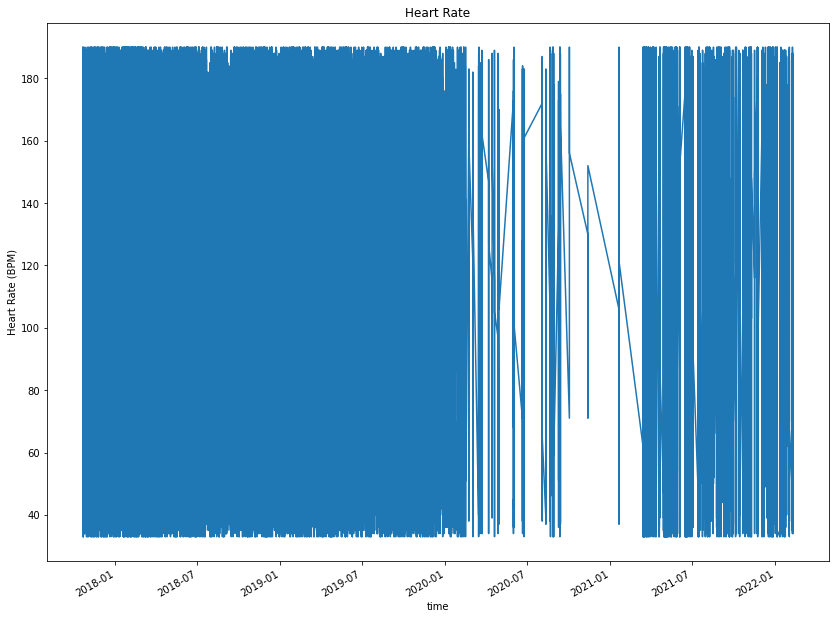

In [8]:
hr_plot = hr.plot(x='time', y='hr', title='Heart Rate', figsize=(14, 11), xlabel='time', ylabel='Heart Rate (BPM)', legend=False)

# hr_plot.get_figure().savefig('./pdf/heart_rate_2018-2022.pdf') # uncomment and run to save the figure as a pdf

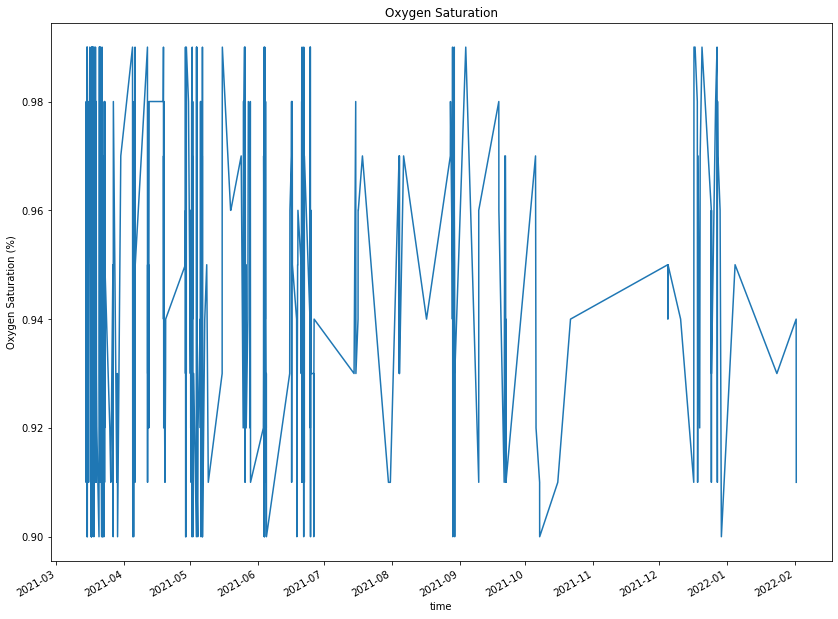

In [9]:
o2_plot = o2.plot(x='time', y='o2', title='Oxygen Saturation', figsize=(14, 11), xlabel='time', ylabel='Oxygen Saturation (%)', legend=False)

# o2_plot.get_figure().savefig('./pdf/o2_saturation_2021.pdf') # uncomment and run to save the figure as a pdf

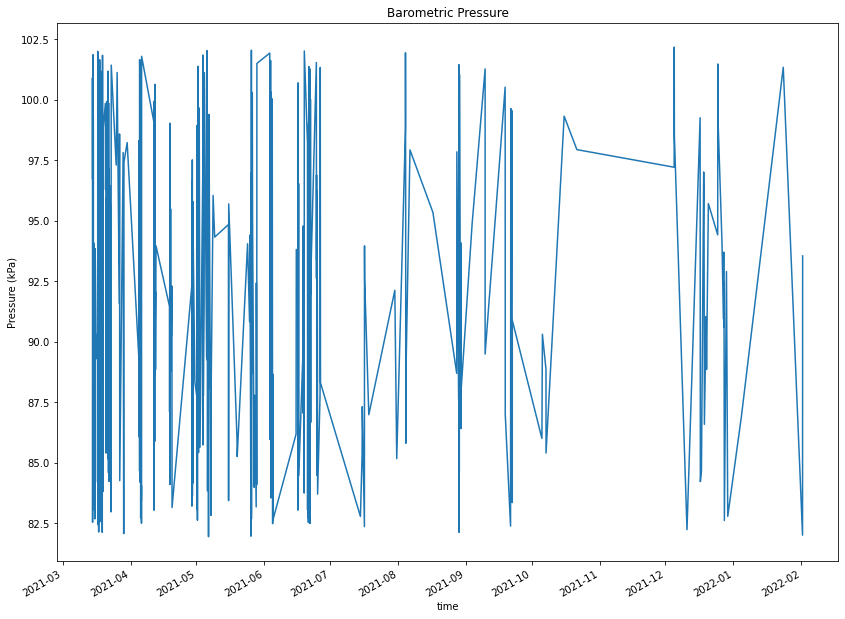

In [10]:
pressure_plot = o2.plot(x='time', y='pressure', title='Barometric Pressure', figsize=(14, 11), xlabel='time', ylabel='Pressure (kPa)', legend=False)

# pressure_plot.get_figure().savefig('./pdf/barometric_pressure_2021.pdf') # uncomment and run to save the figure as a pdf

Since that is a lot of data, we can filter it down to a single day. 

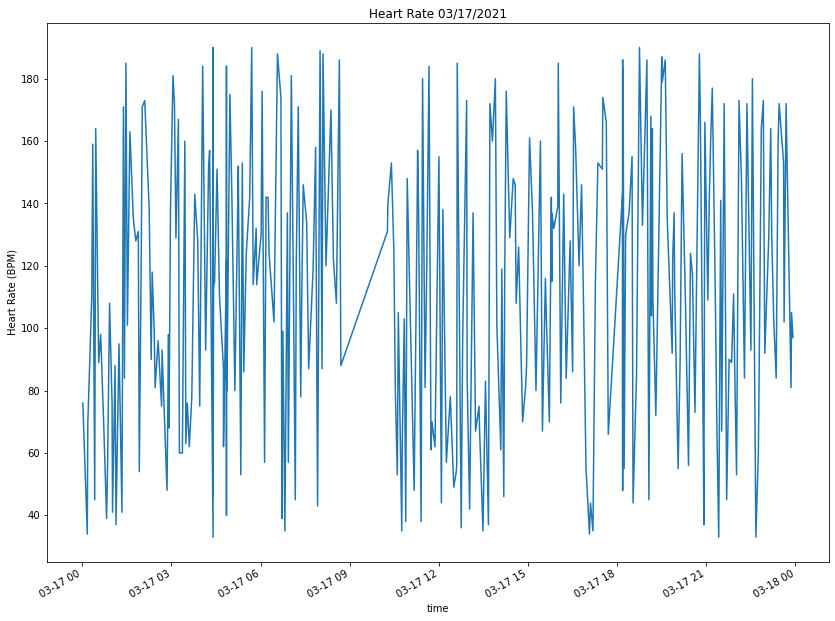

In [11]:
filter = (hr.time.dt.year == 2021) & (hr.time.dt.month == 3) & (hr.time.dt.day == 17)
hr_filtered_plot = hr[filter].plot(x='time', y='hr', title='Heart Rate 03/17/2021', figsize=(14, 11), xlabel='time', ylabel='Heart Rate (BPM)', legend=False)

# hr_filtered_plot.get_figure().savefig('./pdf/heart_rate_2021-03-17.pdf') # uncomment and run to save the figure as a pdf

We can also use the `scatter` plot to scatter data instead of defaulting to a line plot.

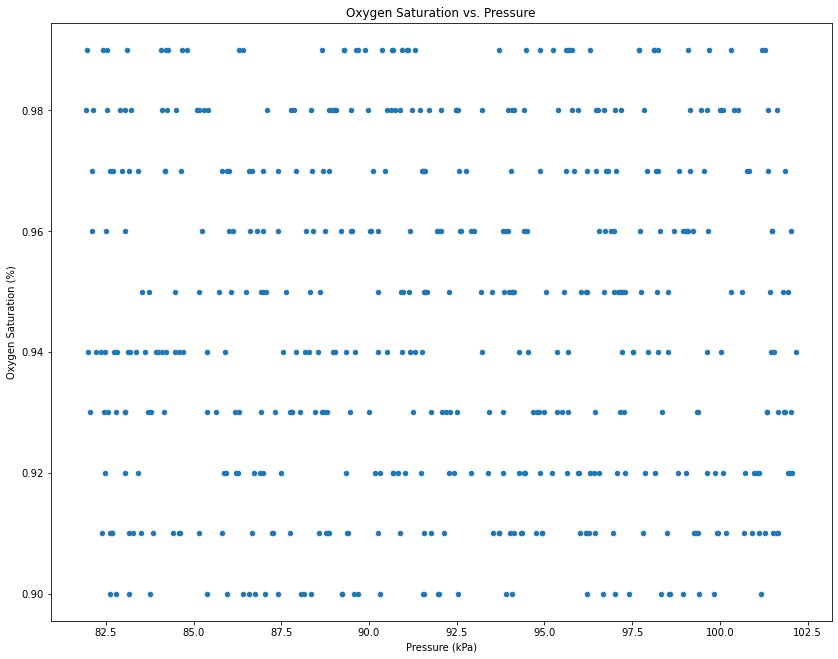

In [12]:
scatter = o2.plot(kind='scatter', x='pressure', y='o2', title='Oxygen Saturation vs. Pressure', figsize=(14, 11), xlabel='Pressure (kPa)', ylabel='Oxygen Saturation (%)', legend=False)

# scatter.get_figure().savefig('./pdf/oxygen_saturation_v_pressure.pdf') # uncomment and run to save the figure as a pdf

### Merge Heart Rate and Oxygen Saturation

Since these data frames shate a `time` column, we can use the `merge` method to combine data points with the same time. Before merging, we'll drop duplicated timestamps to only keep one row per timestamp.

In [13]:
hr_no_dups = hr.drop_duplicates(subset='time', keep='first')
o2_no_dups = o2.drop_duplicates(subset='time', keep='first')

merged = hr_no_dups.merge(o2_no_dups, on='time')

merged

,time,hr,o2,pressure
0,2021-03-14 14:32:00,95,0.97,96.7506
1,2021-03-14 14:41:00,184,0.91,100.9064
2,2021-03-14 16:01:00,150,0.98,82.5342
3,2021-03-14 18:33:00,112,0.92,95.9840
4,2021-03-14 19:04:00,90,0.96,86.8079
...,...,...,...,...
487,2021-12-29 09:47:00,182,0.90,82.7772
488,2022-01-04 15:51:00,123,0.95,86.9245
489,2022-01-23 17:30:00,105,0.93,101.3462
490,2022-02-01 12:37:00,149,0.94,81.9985


Now, we can plot the merged data frame. We can use the `twinx` method to place two figures with differing y-axes on top of each other.

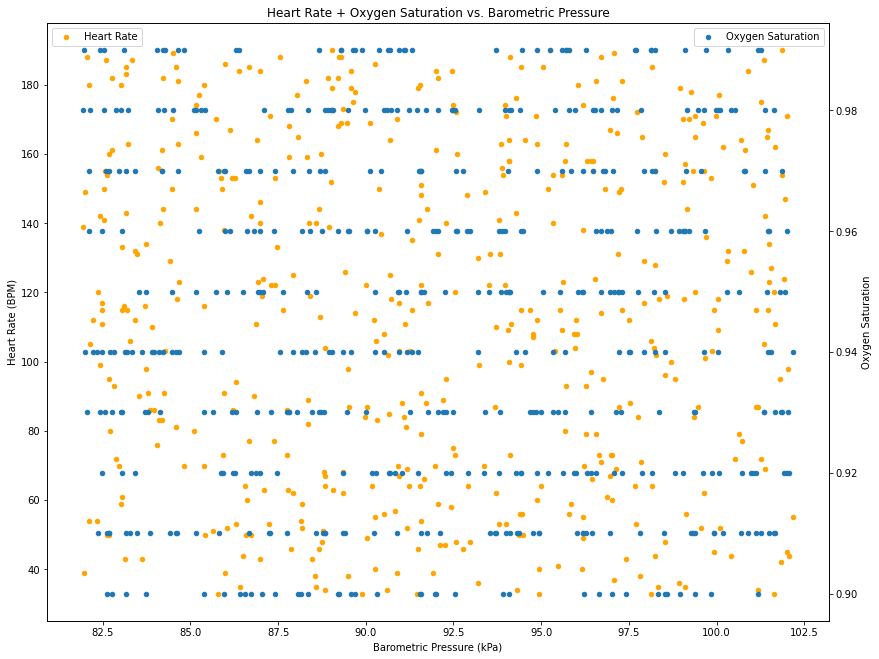

In [14]:
ax = merged.plot(kind='scatter', x='pressure', y='hr', color='orange', figsize=(14, 11), title='Heart Rate + Oxygen Saturation vs. Barometric Pressure', xlabel='Barometric Pressure (kPa)', ylabel='Heart Rate (BPM)')
ax.legend(['Heart Rate'], loc='upper left')
ax = ax.twinx()
hr_o2_plot = merged.plot(kind='scatter', x='pressure', y='o2', ax=ax, figsize=(14, 11), ylabel='Oxygen Saturation').legend(['Oxygen Saturation'], loc='upper right')

# hr_o2_plot.get_figure().savefig('./pdf/hr_o2_v_pressure.pdf') # uncomment and run to save the figure as a pdf

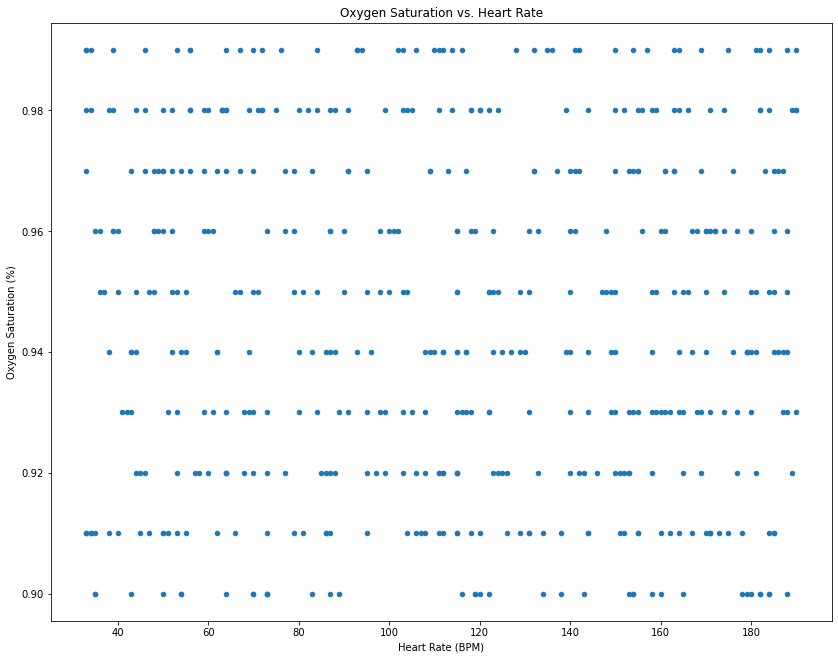

In [15]:
o2_hr_plot = merged.plot(kind='scatter', x='hr', y='o2', figsize=(14, 11), title='Oxygen Saturation vs. Heart Rate', xlabel='Heart Rate (BPM)', ylabel='Oxygen Saturation (%)')

# o2_hr_plot.get_figure().savefig('./pdf/o2_v_hr.pdf') # uncomment and run to save the figure as a pdf

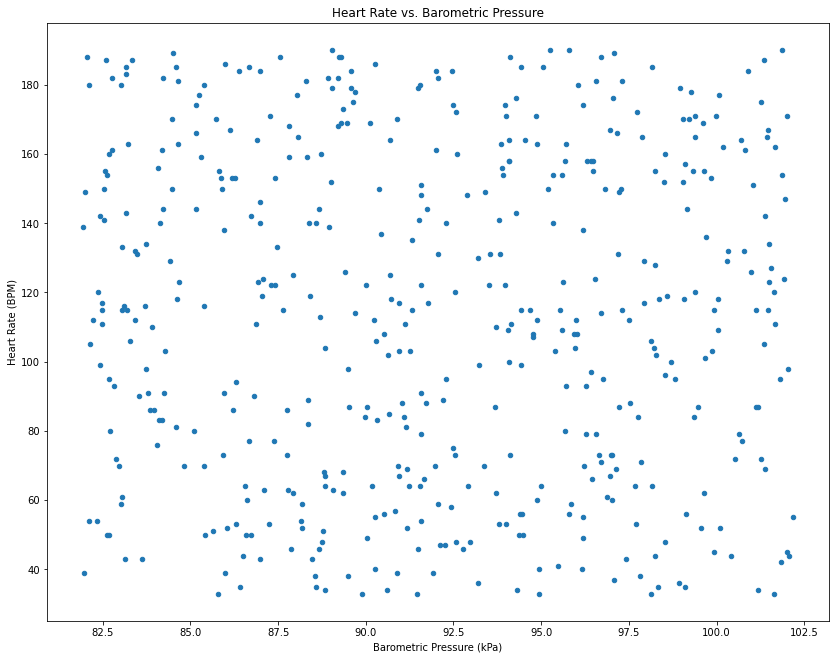

In [16]:
hr_pressure = merged.plot(kind='scatter', x='pressure', y='hr', figsize=(14, 11), title='Heart Rate vs. Barometric Pressure', xlabel='Barometric Pressure (kPa)', ylabel='Heart Rate (BPM)')

# hr_pressure.get_figure().savefig('./pdf/hr_v_pressure.pdf') # uncomment and run to save the figure as a pdf

### Correlation Coefficient

We can compute the correlation coefficients for a data frame using the `corr` method.

In [17]:
merged.corr()

,hr,o2,pressure
hr,1.000000,-0.039898,-0.022986
o2,-0.039898,1.000000,-0.024118
pressure,-0.022986,-0.024118,1.000000


### Normalize Data

We can normalize the data with min/max normalization to scale the values to be between 0 and 1.

$$\begin{align*}
v' &= \frac{v - min}{max - min}(new\_max - new\_min) + new\_min \\
&= \frac{v - min}{max - min}(1 - 0) + 0 \\
&= \frac{v - min}{max - min} \\
\end{align*}$$

In [18]:
no_times = merged[['hr', 'o2', 'pressure']]
normalized = (no_times - no_times.min()) / (no_times.max() - no_times.min())

normalized

,hr,o2,pressure
0,0.394904,0.777778,0.731840
1,0.961783,0.111111,0.937115
2,0.745223,0.888889,0.029622
3,0.503185,0.222222,0.693974
4,0.363057,0.666667,0.240721
...,...,...,...
487,0.949045,0.000000,0.041625
488,0.573248,0.555556,0.246481
489,0.458599,0.333333,0.958839
490,0.738854,0.444444,0.003161


### k-means clustering

We can now cluster the data using k-means clustering. This approach clusters data points into k clusters by iteratively refining clusters to contain data points which are closest to the centroid of the cluster. 

First, let's define a function to calculate the distance between two points

$$d = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$$

We'll also define a function that uses this distance function to calculate the closest point in a list of centroids.

In [19]:
def dist(x1, y1, x2, y2):
    return np.sqrt(((x2 - x1) ** 2) + ((y2 - y1) ** 2))

def closest_centroid(point, centroids, xcol, ycol):
  closest = -1
  closest_dist = float('inf')
  for i in range(len(centroids)):
      dist_to_centroid = dist(point[0], point[1], centroids[xcol][i], centroids[ycol][i])
      if dist_to_centroid < closest_dist:
          closest_dist = dist_to_centroid
          closest = i
  return closest

Next, we can define a function to generate random starting points using k random samples from our data frame.

In [20]:
def random_sample(df, k, xcol, ycol):
  return df.sample(n=k)[[xcol, ycol]].reset_index()

start_points = random_sample(df=normalized, k=4, xcol='pressure', ycol='hr')

start_points


,index,pressure,hr
0,14,0.453233,0.496815
1,331,0.456779,0.121019
2,376,0.027004,0.535032
3,202,0.512018,0.394904


Now, we'll use these functions to expand our data frame by adding a new `cluster` column that holds the closest centroid.

In [21]:
def cluster_data(df, xcol, ycol, centroids):
  return df.assign(cluster=df.apply(lambda x: closest_centroid((x[xcol], x[ycol]), centroids, xcol, ycol), axis=1))

with_clusters = cluster_data(normalized, 'pressure', 'hr', start_points)

with_clusters

,hr,o2,pressure,cluster
0,0.394904,0.777778,0.731840,3
1,0.961783,0.111111,0.937115,0
2,0.745223,0.888889,0.029622,2
3,0.503185,0.222222,0.693974,3
4,0.363057,0.666667,0.240721,0
...,...,...,...,...
487,0.949045,0.000000,0.041625,2
488,0.573248,0.555556,0.246481,0
489,0.458599,0.333333,0.958839,3
490,0.738854,0.444444,0.003161,2


We can also create a function to plot our data, colored by cluster.

To do this, we'll first add a new `color` column that matches a cluster's id to an index in an array of colors. We can then use this column as the color value when plotting the data frame.

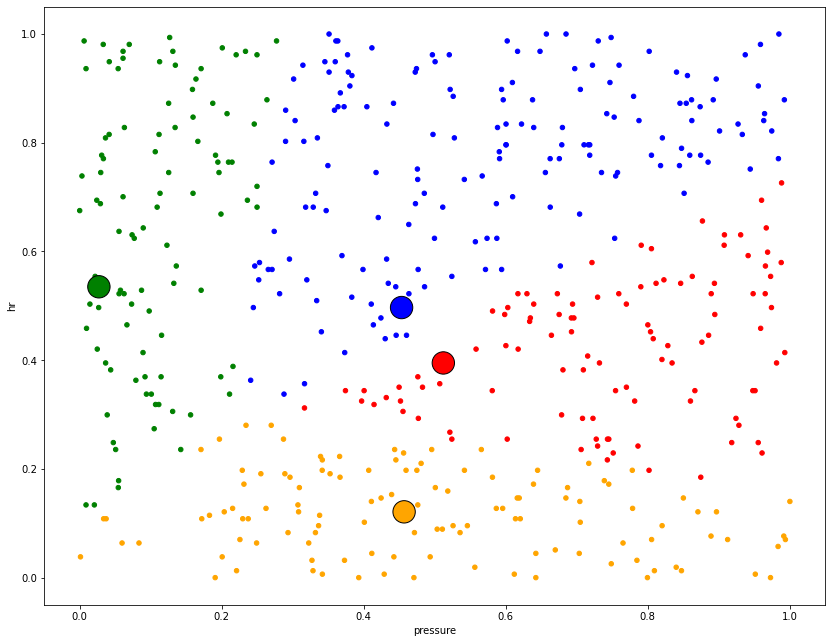

In [22]:
def plot_clusters(df, xcol, ycol, clusters, colors):
  with_colors = df.assign(color=df.cluster.apply(lambda x: colors[x]))
  
  fig, ax = plt.subplots(figsize=(14, 11))
  with_colors.plot(kind='scatter', x=xcol, y=ycol, ax=ax, color=with_colors.color)
  clusters.plot(kind='scatter', x=xcol, y=ycol, ax=ax, s=500, color=colors, edgecolor='black')
  return fig

first_cluster_plot = plot_clusters(with_clusters, 'pressure', 'hr', start_points, ['blue', 'orange', 'green', 'red'])

# first_cluster_plot.savefig('./pdf/first_random_cluster.pdf') # uncomment and run to save the figure as a pdf


Now, we calculate the centroid of each cluster so we can refine the clusters. 

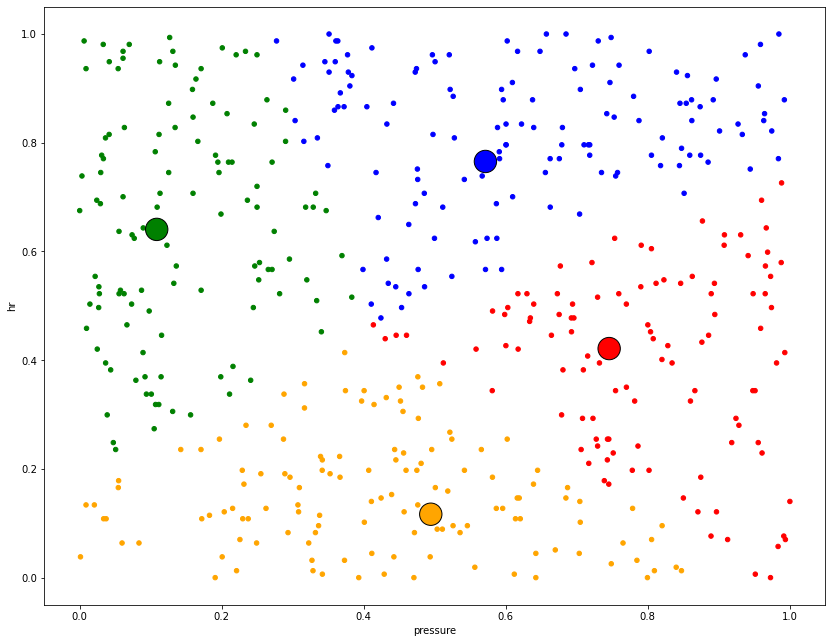

In [23]:
def regenerate_centroids(df):
  return df.groupby('cluster').mean().reset_index()

new_centroids = regenerate_centroids(with_clusters)
new_clusters = cluster_data(normalized, 'pressure', 'hr', new_centroids)
second_cluster_plot = plot_clusters(new_clusters, 'pressure', 'hr', new_centroids, ['blue', 'orange', 'green', 'red'])

# second_cluster_plot.savefig('./pdf/second_cluster.pdf') # uncomment and run to save the figure as a pdf

We can wrap all of the logic into a recursive function.

,hr,o2,pressure,cluster
0,0.394904,0.777778,0.731840,0
1,0.961783,0.111111,0.937115,1
2,0.745223,0.888889,0.029622,3
3,0.503185,0.222222,0.693974,0
4,0.363057,0.666667,0.240721,2
...,...,...,...,...
487,0.949045,0.000000,0.041625,3
488,0.573248,0.555556,0.246481,3
489,0.458599,0.333333,0.958839,0
490,0.738854,0.444444,0.003161,3


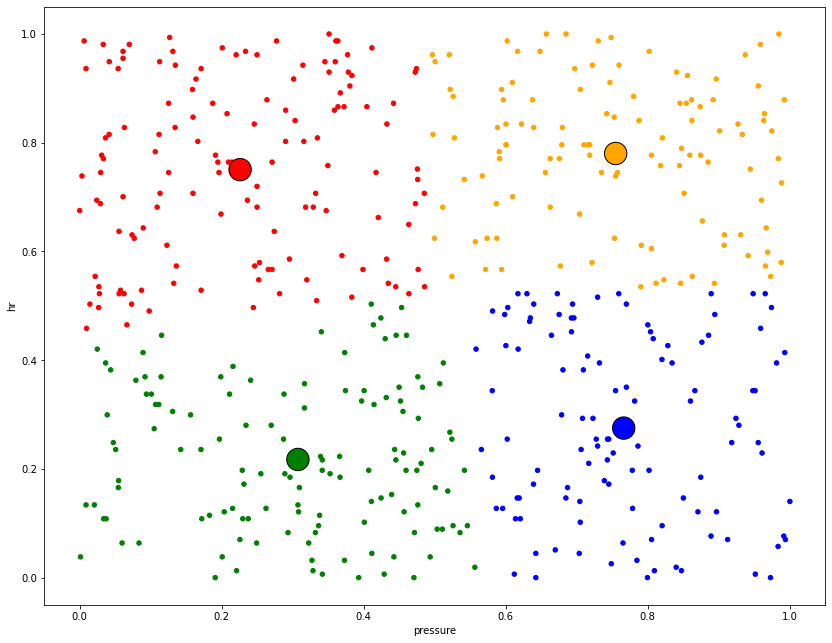

In [24]:
def kmeans(df, xcol, ycol, k, max_iter, colors, init_centroids=[], last_centroids=[]):
  if max_iter == 0:
    plt = plot_clusters(df, xcol, ycol, last_centroids, colors)
    return df, plt
  elif len(last_centroids) == 0 and len(init_centroids) == 0:
    centroids = random_sample(df, k, xcol, ycol)
  elif len(last_centroids) == 0:
    centroids = init_centroids
  else:
    centroids = regenerate_centroids(df)
  new_df = cluster_data(df, xcol, ycol, centroids)
  return kmeans(new_df, xcol, ycol, k, max_iter - 1, colors, last_centroids=centroids)

colors = ['blue', 'orange', 'green', 'red']
random_clustered, random_clustered_plot = kmeans(normalized, 'pressure', 'hr', 4, 100, colors)

# random_clustered_plot.savefig('./pdf/kmeans.pdf') # uncomment and run to save the figure as a pdf

random_clustered

,hr,o2,pressure,cluster
0,0.394904,0.777778,0.731840,2
1,0.961783,0.111111,0.937115,3
2,0.745223,0.888889,0.029622,1
3,0.503185,0.222222,0.693974,3
4,0.363057,0.666667,0.240721,0
...,...,...,...,...
487,0.949045,0.000000,0.041625,1
488,0.573248,0.555556,0.246481,1
489,0.458599,0.333333,0.958839,2
490,0.738854,0.444444,0.003161,1


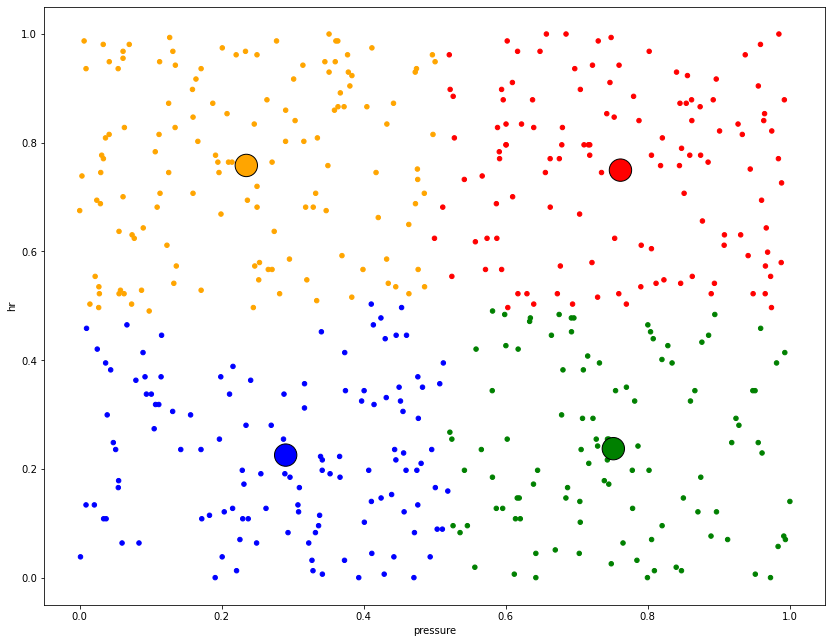

In [25]:
init_centroids = pd.DataFrame([[0, 0.1, 0.2], [1, 0.2, 0.5], [2, 0.6, 0.2], [3, 0.9, 0.5]], columns=['index', 'pressure', 'hr'])

clustered, kmeans_plot = kmeans(normalized, 'pressure', 'hr', 4, 100, colors, init_centroids)

# kmeans_plot.savefig('./pdf/kmeans_clusters.pdf') # uncomment and run to save the figure as a pdf

clustered

,hr,o2,pressure,cluster
0,0.394904,0.777778,0.731840,9
1,0.961783,0.111111,0.937115,5
2,0.745223,0.888889,0.029622,3
3,0.503185,0.222222,0.693974,9
4,0.363057,0.666667,0.240721,7
...,...,...,...,...
487,0.949045,0.000000,0.041625,2
488,0.573248,0.555556,0.246481,3
489,0.458599,0.333333,0.958839,9
490,0.738854,0.444444,0.003161,3


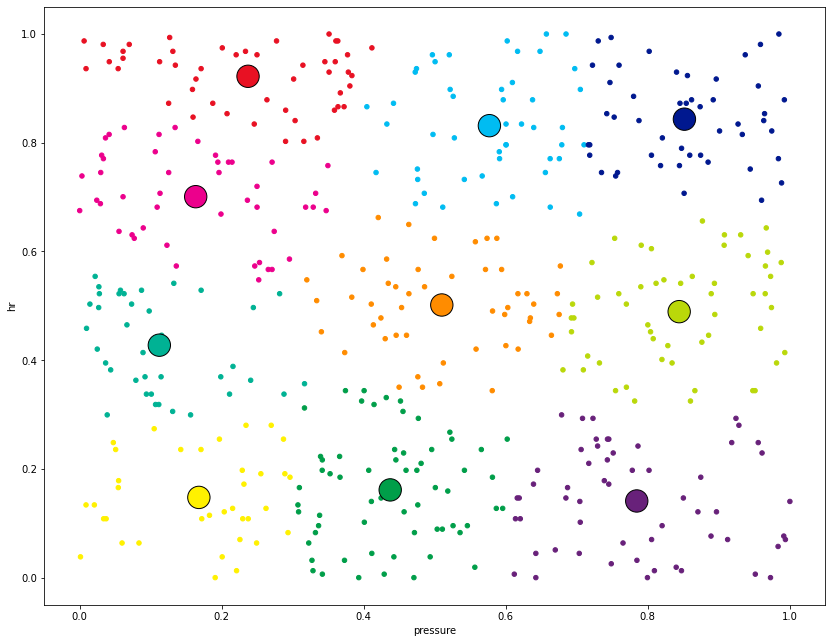

In [26]:
ten_colors = ["#fff100","#ff8c00","#e81123","#ec008c","#68217a","#00188f","#00bcf2","#00b294","#009e49","#bad80a"]
more_clusters, more_clusters_plot = kmeans(normalized, 'pressure', 'hr', 10, 100, ten_colors)

# more_clusters_plot.savefig('./pdf/more_clusters.pdf') # uncomment and run to save the figure as a pdf

more_clusters